In [3]:
pip install shap matplotlib pandas numpy scikit-learn


  Using cached shap-0.46.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (24 kB)
  Using cached matplotlib-3.10.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp311-cp311-macosx_11_0_arm64.whl.metadata (89 kB)
  Using cached scikit_learn-1.6.1-cp311-cp311-macosx_12_0_arm64.whl.metadata (31 kB)
  Using cached scipy-1.15.2-cp311-cp311-macosx_14_0_arm64.whl.metadata (61 kB)
  Using cached tqdm-4.67.1-py3-none-any.whl.metadata (57 kB)
  Using cached slicer-0.0.8-py3-none-any.whl.metadata (4.0 kB)
  Using cached numba-0.61.0-cp311-cp311-macosx_11_0_arm64.whl.metadata (2.7 kB)
  Using cached cloudpickle-3.1.1-py3-none-any.whl.metadata (7.1 kB)
  Using cached contourpy-1.3.1-cp311-cp311-macosx_11_0_arm64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.56.0-cp311-cp311-macosx_10_9_universal2.whl.metadata (101 kB)
  Using cached kiwisolver-1.4.8-cp311-cp311-macosx_11_0_arm64.whl.metadata (6.2 kB)
  U

In [4]:
import shap
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split


/opt/homebrew/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [18]:
# Load dataset
df = pd.read_csv("insurance.csv")

# Convert categorical variables using one-hot encoding
df = pd.get_dummies(df, columns=["sex", "smoker", "region"], drop_first=True)

# Define features and target
X = df.drop(columns=["charges"])  # Features
y = df["charges"]  # Target variabl

In [19]:
# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Ensure train & test sets have the same columns
X_train, X_test = X_train.align(X_test, join="left", axis=1, fill_value=0)


In [20]:
# Train the model
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

print("✅ Model trained successfully!")

✅ Model trained successfully!


In [22]:
print(type(y_test))
print(type(y_pred))
print(y_test.dtype)
print(y_pred.dtype)


<class 'pandas.core.series.Series'>
<class 'numpy.ndarray'>
float64
float64


In [26]:
import numpy as np

print("NaN in y_test:", np.isnan(y_test).any())
print("NaN in y_pred:", np.isnan(y_pred).any())
print("Inf in y_test:", np.isinf(y_test).any())
print("Inf in y_pred:", np.isinf(y_pred).any())


NaN in y_test: False
NaN in y_pred: False
Inf in y_test: False
Inf in y_pred: False


In [27]:
print("y_test type:", type(y_test), "y_pred type:", type(y_pred))
print("y_test dtype:", y_test.dtype, "y_pred dtype:", y_pred.dtype)
print("y_test shape:", y_test.shape, "y_pred shape:", y_pred.shape)


y_test type: <class 'numpy.ndarray'> y_pred type: <class 'numpy.ndarray'>
y_test dtype: float64 y_pred dtype: float64
y_test shape: (268,) y_pred shape: (268,)


In [29]:
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)
print(f"📊 RMSE: {rmse:.2f}")


📊 RMSE: 4576.29


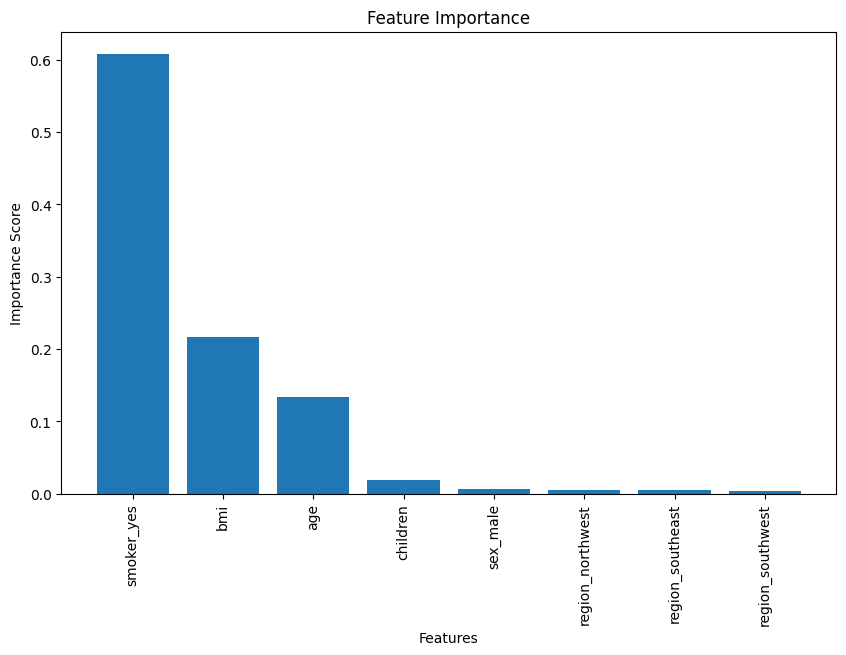

In [30]:
import matplotlib.pyplot as plt

# Get feature importances
importances = model.feature_importances_

# Sort and plot
indices = np.argsort(importances)[::-1]
plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.bar(range(len(importances)), importances[indices], align="center")
plt.xticks(range(len(importances)), X_train.columns[indices], rotation=90)
plt.xlabel("Features")
plt.ylabel("Importance Score")
plt.show()


In [31]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    "n_estimators": [50, 100, 200],
    "max_depth": [None, 10, 20, 30],
    "min_samples_split": [2, 5, 10],
    "min_samples_leaf": [1, 2, 4],
}

grid_search = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=5, scoring="neg_mean_squared_error", n_jobs=-1)
grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)


Best Parameters: {'max_depth': 10, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 200}


In [32]:
y_final_pred = model.predict(X_test)
final_rmse = np.sqrt(mean_squared_error(y_test, y_final_pred))

print(f"📊 Final RMSE on Unseen Data: {final_rmse:.2f}")


📊 Final RMSE on Unseen Data: 4576.29


In [33]:
import joblib

joblib.dump(model, "random_forest_model.pkl")
print("✅ Model saved successfully!")


✅ Model saved successfully!
